In [6]:
#Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [3]:
path = 'Simmons.xls'
df = pd.read_excel(path)
df.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


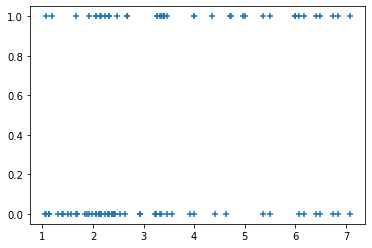

In [8]:
plt.scatter(df.Spending,df.Coupon,marker='+')

In [11]:
x = df[['Card','Spending']]
y = df['Coupon']
x = sm.add_constant(x)
logistic_model = sm.Logit(y,x)
result = logistic_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.1012
Time:                        23:49:19   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.

In [14]:
#Confusion matrix
path = 'Simmons.xls'
df = pd.read_excel(path)
df.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [15]:
df.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x = df[['Spending','Card']]
y = df['Coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [33]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train.ravel())
y_pred = log_reg.predict(x_test)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0]


In [19]:
y_prob_train = log_reg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)
print(y_prob_train)

[0.56360858 0.32677015 0.72461697 0.59848283 0.6477893  0.36898186
 0.24662036 0.51802204 0.50995988 0.30304465 0.44168753 0.40946175
 0.18821112 0.64654819 0.32202887 0.37059938 0.19810701 0.52313215
 0.26667344 0.56903464 0.25940824 0.24855984 0.395442   0.32677015
 0.26416991 0.5565972  0.27021732 0.35110022 0.42422351 0.51585554
 0.25384722 0.68942469 0.56826852 0.32278701 0.21929776 0.33175187
 0.73744357 0.25384722 0.40126411 0.25794416 0.37990144 0.45456066
 0.79314986 0.24771814 0.77318285 0.62710096 0.47657584 0.34870531
 0.18895457 0.43915062 0.32692286 0.47072188 0.50252916 0.40879059
 0.36069887 0.33383241 0.24226202 0.42838235 0.4504338  0.73025908
 0.33894535 0.61922365 0.43255134 0.50102494 0.47683556 0.30282481
 0.21840784 0.24283584 0.24662036 0.33383241 0.78004589 0.59162577
 0.57263414 0.20965192 0.75754459]


In [20]:
y_prob_test = log_reg.predict_proba(x_test)[:,1]
y_prob_test.reshape(1,-1)
print(y_prob_test)

[0.67922963 0.4083713  0.43323291 0.62850692 0.52313215 0.42422351
 0.3314951  0.42069587 0.38973193 0.50449521 0.32750823 0.56809823
 0.22907475 0.59778729 0.45456066 0.23351725 0.20294714 0.51432459
 0.44685737 0.42151327 0.24283584 0.7522796  0.38701157 0.18562675
 0.24219832]


In [21]:
x = sm.add_constant(x)
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.1012
Time:                        23:53:42   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.

In [34]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(score)

0.68


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[13  4]
 [ 4  4]]


In [25]:
true_negetives,false_positives,false_negetives,true_positives = confusion_matrix(y_test,y_pred).ravel()

print("True Positives",true_positives)
print("True negetives",true_negetives)
print("False Positives",false_positives)
print("False negetives",false_negetives)

True Positives 4
True negetives 13
False Positives 4
False negetives 4


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.50      0.50      0.50         8

    accuracy                           0.68        25
   macro avg       0.63      0.63      0.63        25
weighted avg       0.68      0.68      0.68        25



In [30]:
accuracy = (true_positives+true_negetives)/(true_positives+true_negetives+
                                            false_positives+false_negetives)
print("Accuracy",accuracy)

Accuracy 0.68


In [31]:
specificity = true_negetives/(true_negetives + false_positives)
print("Specificity",specificity)

Specificity 0.7647058823529411


In [32]:
sensitivity = true_positives/(true_positives + false_negetives)
print("Sensitivity",sensitivity)

Sensitivity 0.5


In [36]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(y_train,y_prob_train)
roc_auc = auc(fpr,tpr)

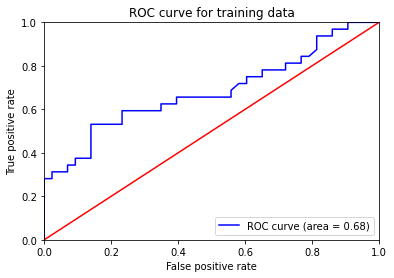

In [39]:
plt.figure()
plt.plot(fpr,tpr,color='blue',label = 'ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'red')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC curve for training data")
plt.legend(loc = 'lower right')
plt.show()

In [40]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob_test)
roc_auc = auc(fpr,tpr)

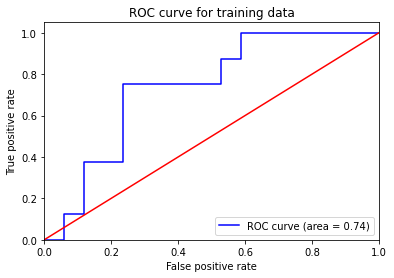

In [43]:
plt.figure()
plt.plot(fpr,tpr,color='blue',label = 'ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'red')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC curve for training data")
plt.legend(loc = 'lower right')
plt.show()

In [44]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob_test)
indices = np.arange(len(fpr))
df_roc = pd.DataFrame({'fpr':pd.Series(fpr,indices),'tpr':pd.Series(tpr,indices),
                       '1-fpr':pd.Series(1-fpr,indices),
                       'tf':pd.Series(tpr-(1-fpr),indices),
                       'thresholds':pd.Series(thresholds,indices)})
df_roc.head()

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000,1.000000,-1.000000,1.752280
1,0.058824,0.000,0.941176,-0.941176,0.752280
2,0.058824,0.125,0.941176,-0.816176,0.679230
3,0.117647,0.125,0.882353,-0.757353,0.628507
4,0.117647,0.375,0.882353,-0.507353,0.568098


In [48]:
print(df_roc)

         fpr    tpr     1-fpr        tf  thresholds
0   0.000000  0.000  1.000000 -1.000000    1.752280
1   0.058824  0.000  0.941176 -0.941176    0.752280
2   0.058824  0.125  0.941176 -0.816176    0.679230
3   0.117647  0.125  0.882353 -0.757353    0.628507
4   0.117647  0.375  0.882353 -0.507353    0.568098
5   0.235294  0.375  0.764706 -0.389706    0.514325
6   0.235294  0.750  0.764706 -0.014706    0.446857
7   0.529412  0.750  0.470588  0.279412    0.408371
8   0.529412  0.875  0.470588  0.404412    0.389732
9   0.588235  0.875  0.411765  0.463235    0.387012
10  0.588235  1.000  0.411765  0.588235    0.331495
11  1.000000  1.000  0.000000  1.000000    0.185627


In [45]:
df_roc.iloc[(df_roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
6,0.235294,0.75,0.764706,-0.014706,0.446857


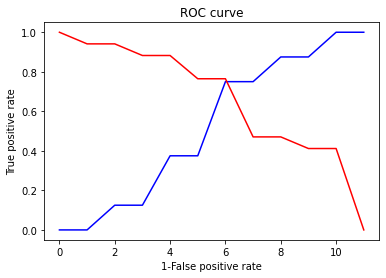

In [47]:
fig,ax = plt.subplots()
plt.plot(df_roc['tpr'],color = 'blue')
plt.plot(df_roc['1-fpr'],color = 'red')
plt.xlabel('1-False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [54]:
#Classification using optimal threshold value
from sklearn.preprocessing import binarize
opt_thresh = 0.44685
y_pred = binarize(y_prob_test.reshape(1,-1), opt_thresh)[0]
print(y_pred)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0.]


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.44685 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [51]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[13  4]
 [ 2  6]]


In [52]:
classification_repo = classification_report(y_test,y_pred)
print(classification_repo)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.60      0.75      0.67         8

    accuracy                           0.76        25
   macro avg       0.73      0.76      0.74        25
weighted avg       0.78      0.76      0.77        25

